## Homework 1 Solutions
### CSCI 4270 / 6270
### Due: January 19, 2024


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
def read_image(image_filepath: str, convert_to_grayscale:bool=False) -> np.ndarray | None:
  """
  Given an images filepath, image_filepath, read in the image as provided or convert to grayscale iff convert_to_grayscale is True

  Args:
    image_filepath (str): Relative filepath to specified image
    convert_to_grayscale (booL) = False: When True, converts given image to grayscale

  Returns:
    np.array | None -> Provides image in matrix form, otherwise is None if an error occured
  """
  image: np.ndarray | None = cv2.imread(image_filepath)
  if (image is None): return None
  if (convert_to_grayscale): image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

def display_image(image: np.ndarray) -> None:
  """
  Shows provided image, as is, without any axes

  Args:
    image (np.ndarray): Image to display
  """
  plt.figure()
  print(image.shape)
  plt.axis("off")
  plt.imshow(image)
  plt.show()


### Image Reading Test

(168, 300, 3)


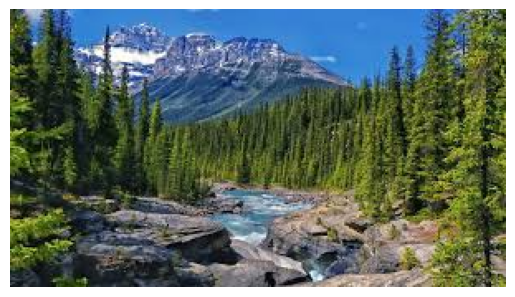

(168, 300, 3)


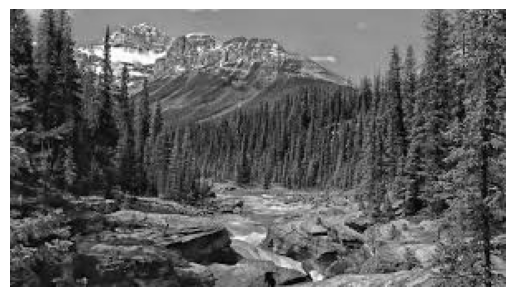

(168, 300, 3)


In [3]:
mountain_filepath: str = './images/mountain.jpg'
mountain_image: np.ndarray = read_image(image_filepath=mountain_filepath)
display_image(image=mountain_image)
mountain_image_grayscaled: np.ndarray = read_image(image_filepath=mountain_filepath, convert_to_grayscale=True)
display_image(image=mountain_image_grayscaled)
print(mountain_image.shape)
# print(mountain_image)

## Problem 1


In [4]:
def center_crop_image_to_square(image: np.ndarray) -> np.ndarray:
  """
  Given {image}, we crop along the larger dimension and use the difference of the dimensions // 2 and remove that amount from both ends of the dimension. Resulting in a cropped image, shaped as a square

  Args:
    image (np.ndarray): Image to be cropped

  Returns:
    np.ndarray -> given image centered cropped into a aquare
  """
  y_max, x_max, _= image.shape
  dim_difference: int = y_max - x_max
  cropped_image: np.ndarray

  if (dim_difference > 0): # Crop along y dimension
    cropped_image = image[dim_difference // 2:y_max - (dim_difference // 2),:,:]
  else: # Crop along x dimension
    dim_difference = np.abs(dim_difference)
    cropped_image = image[:,dim_difference // 2:x_max - (dim_difference // 2),:]
  return cropped_image


def resize_image(image: np.ndarray, shape: tuple[int]) -> np.ndarray:
  """
  Resizes given {image} into {shape}

  Args:
    image (np.ndarray): Image to be resized
    shape (tuple[int]): New shape for image

  Returns:
    np.ndarray -> {image} with shape {shape}
  """
  return cv2.resize(src=image, dsize=shape)


def rotate_image(image: np.ndarray, angle: int = 90):
  """
  Takes given {image} and rotates it {angle} degrees

  Args:
    image (np.ndarray): Image to be rotated
    angle (int): Angle for given image to be rotated
      Options: -90,90,180,270

  Returns:
    np.ndarray -> image rotated {angle} degrees clockwise
  """
  rotated_image: np.ndarray
  if (angle == 90): rotated_image = np.transpose(image, (1,0,2))[:,::-1,:]
  elif (angle == 180): rotated_image = image[::-1,:,:]
  elif (angle == 270 or angle == -90): rotated_image = np.transpose(image, (1,0,2))[::-1,:,:]
  else:
    print("Angle not supported, output is original image")
    rotated_image = image
  return rotated_image


def create_checkerboard_image(image: np.ndarray, n: int) -> np.ndarray:
  """
  Creates a checkboard of {image} repeated n times using np.tile()

  Args:
    image (np.ndarray): Image to be repeated
    n (int): How many times to repeat image

  Returns:
    np.ndarray -> image repeated n times in checkerboard pattern
  """
  return np.tile(image, (n,n,1))


(100, 100, 3)
(100, 100, 3)


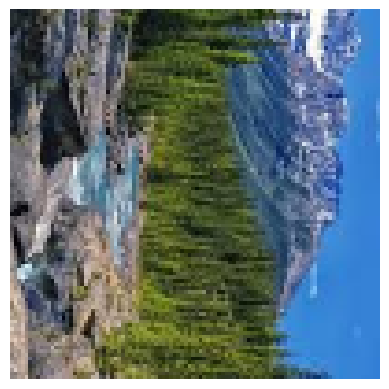

(100, 100, 3)


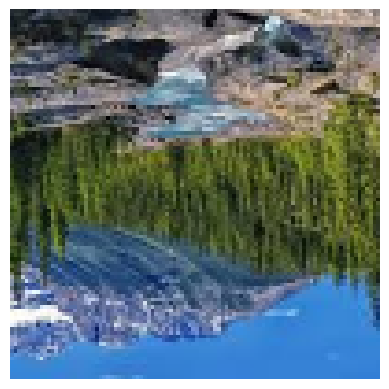

(100, 100, 3)


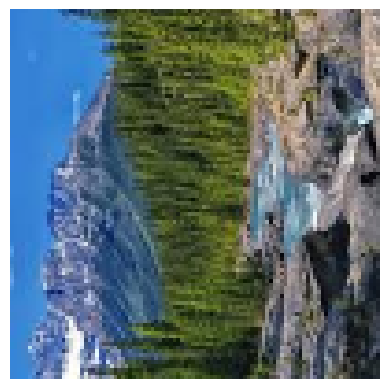

(200, 200, 3)


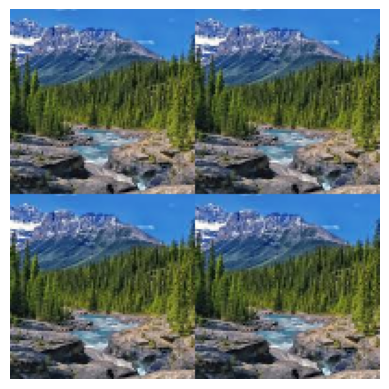

(200, 200, 3)


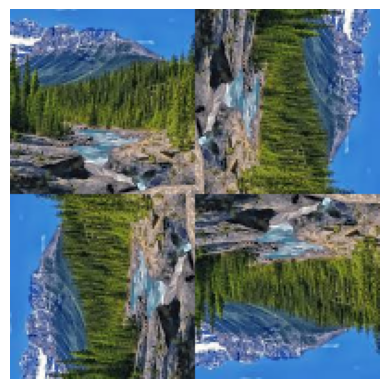

In [5]:
mountain_image_cropped: np.ndarray = center_crop_image_to_square(image=mountain_image)
mountain_image_rs: np.ndarray = resize_image(image=mountain_image_cropped, shape=(100,100))
print(mountain_image_rs.shape)

display_image(image=rotate_image(image=mountain_image_rs))
display_image(image=rotate_image(image=mountain_image_rs, angle=180))
display_image(image=rotate_image(image=mountain_image_rs, angle=270))
display_image(image=create_checkerboard_image(image=mountain_image_rs, n=2))

a,b,c,d = mountain_image_rs, rotate_image(image=mountain_image_rs), rotate_image(image=mountain_image_rs, angle=270), rotate_image(image=mountain_image_rs, angle=180)
top = np.concatenate((a,b), axis=1)
bot = np.concatenate((c,d), axis=1)
grid_image: np.ndarray = np.concatenate((top, bot), axis=0)

display_image(image=grid_image)

(100, 100, 3)
(633, 1000, 3)


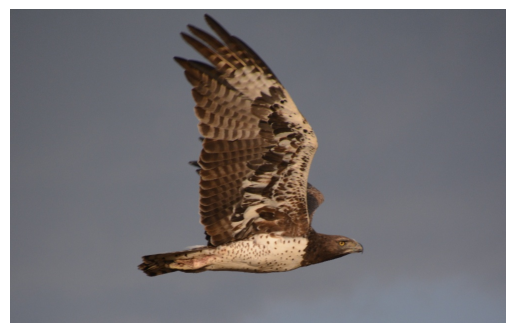

(100, 100, 3)


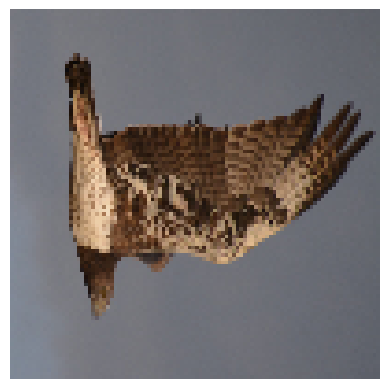

(100, 100, 3)


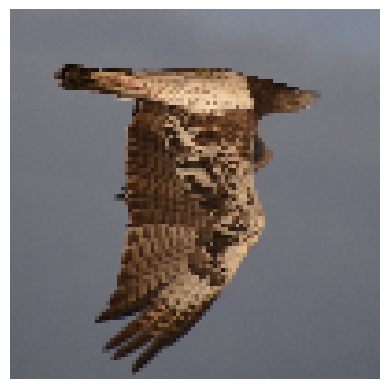

(100, 100, 3)


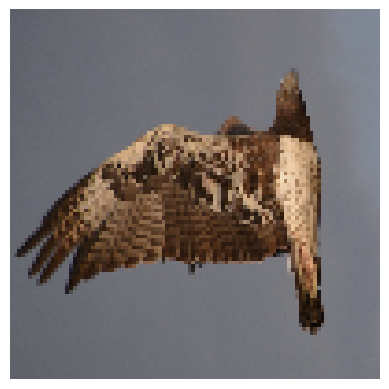

(200, 200, 3)


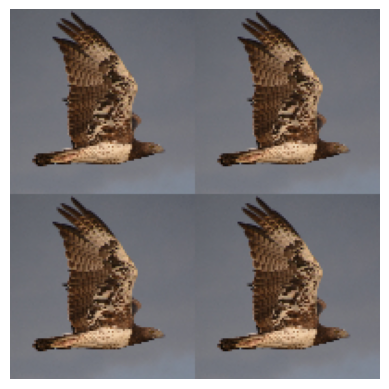

(200, 200, 3)


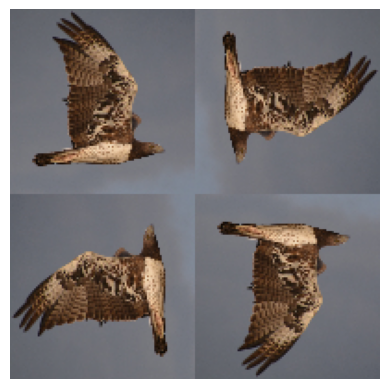

In [6]:
eagle_image: np.ndarray = read_image(image_filepath='./images/eagle.jpg')
eagle_image_cropped: np.ndarray = center_crop_image_to_square(image=eagle_image)
eagle_image_rs: np.ndarray = resize_image(image=eagle_image_cropped, shape=(100,100))
print(eagle_image_rs.shape)

display_image(image=eagle_image)
display_image(image=rotate_image(image=eagle_image_rs))
display_image(image=rotate_image(image=eagle_image_rs, angle=180))
display_image(image=rotate_image(image=eagle_image_rs, angle=270))
display_image(image=create_checkerboard_image(image=eagle_image_rs, n=2))

a,b,c,d = eagle_image_rs, rotate_image(image=eagle_image_rs), rotate_image(image=eagle_image_rs, angle=270), rotate_image(image=eagle_image_rs, angle=180)
top = np.concatenate((a,b), axis=1)
bot = np.concatenate((c,d), axis=1)
grid_image: np.ndarray = np.concatenate((top, bot), axis=0)

display_image(image=grid_image)

In [7]:
def p1_checker(image_filepath:str , m: int, n: int) -> tuple[np.ndarray, tuple[int]]:
  """
  Takes in an image, image_filepath, and creates a checkerboard pattern with four quadrants:
    - Q1: Scales image by 2, stretching image call it im'
    - Q2: im' rotated clockwise 90deg
    - Q3: im' rotated counterclockwise 90deg
    - Q4: im' upside down or reflected across x-axis

  Args:
    image_filepath (str): Relative path to given image for processing
    m (int): Scaling factor
    n (int): Scaling factor

  Returns:
    tuple[np.ndarray,tuple[int]] -> checkerboard image and d-dimensional tuple representing the shape of the image
  """
  image: np.ndarray = read_image(image_filepath=image_filepath)
  cropped_image: np.ndarray = center_crop_image_to_square(image=image)
  cropped_image_rs: np.ndarray = resize_image(image=cropped_image, shape= (m,m))

  image_cw: np.ndarray = rotate_image(image=cropped_image_rs)
  image_ud: np.ndarray = rotate_image(image=cropped_image_rs, angle=180)
  image_ccw: np.ndarray = rotate_image(image=cropped_image_rs, angle=270)

  top_row: np.ndarray = np.concatenate((cropped_image_rs, image_cw), axis=1)
  bottom_row: np.ndarray = np.concatenate((image_ccw, image_ud), axis=1)
  grid_image: np.ndarray = np.concatenate((top_row, bottom_row), axis=0)
  checkerboard_image: np.ndarray = create_checkerboard_image(image=grid_image, n=n)

  print(f"Final shape is {checkerboard_image.shape}")
  display_image(image=checkerboard_image)

  return checkerboard_image, checkerboard_image.shape

Final shape is (400, 400, 3)
(400, 400, 3)


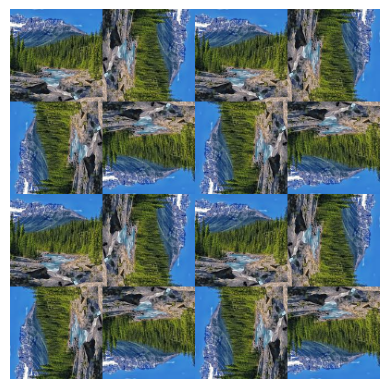

(array([[[ 57, 132, 213],
         [ 57, 132, 213],
         [ 56, 133, 214],
         ...,
         [ 53, 135, 218],
         [ 56, 133, 215],
         [ 57, 132, 213]],
 
        [[ 56, 133, 215],
         [ 56, 133, 215],
         [ 55, 133, 215],
         ...,
         [ 53, 135, 217],
         [ 56, 133, 215],
         [ 57, 132, 213]],
 
        [[ 53, 135, 218],
         [ 53, 135, 217],
         [ 55, 135, 216],
         ...,
         [ 55, 135, 216],
         [ 55, 133, 215],
         [ 56, 133, 214]],
 
        ...,
 
        [[ 56, 133, 214],
         [ 55, 133, 215],
         [ 55, 135, 216],
         ...,
         [ 53, 129, 215],
         [ 53, 129, 215],
         [ 52, 128, 214]],
 
        [[ 57, 132, 213],
         [ 56, 133, 215],
         [ 53, 135, 217],
         ...,
         [ 51, 127, 213],
         [ 51, 127, 213],
         [ 51, 127, 213]],
 
        [[ 57, 132, 213],
         [ 56, 133, 215],
         [ 53, 135, 218],
         ...,
         [ 50, 126, 214],
  

In [8]:
# Output
p1_checker('./images/mountain.jpg',100,2)

Final shape is (400, 400, 3)
(400, 400, 3)


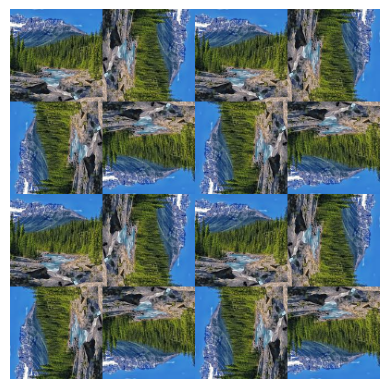

(array([[[ 57, 132, 213],
         [ 57, 132, 213],
         [ 56, 133, 214],
         ...,
         [ 53, 135, 218],
         [ 56, 133, 215],
         [ 57, 132, 213]],
 
        [[ 56, 133, 215],
         [ 56, 133, 215],
         [ 55, 133, 215],
         ...,
         [ 53, 135, 217],
         [ 56, 133, 215],
         [ 57, 132, 213]],
 
        [[ 53, 135, 218],
         [ 53, 135, 217],
         [ 55, 135, 216],
         ...,
         [ 55, 135, 216],
         [ 55, 133, 215],
         [ 56, 133, 214]],
 
        ...,
 
        [[ 56, 133, 214],
         [ 55, 133, 215],
         [ 55, 135, 216],
         ...,
         [ 53, 129, 215],
         [ 53, 129, 215],
         [ 52, 128, 214]],
 
        [[ 57, 132, 213],
         [ 56, 133, 215],
         [ 53, 135, 217],
         ...,
         [ 51, 127, 213],
         [ 51, 127, 213],
         [ 51, 127, 213]],
 
        [[ 57, 132, 213],
         [ 56, 133, 215],
         [ 53, 135, 218],
         ...,
         [ 50, 126, 214],
  

In [9]:
fn = './images/mountain.jpg'
m = 100
n = 2

p1_checker(fn, m, n)

Final shape is (1024, 1024, 3)
(1024, 1024, 3)


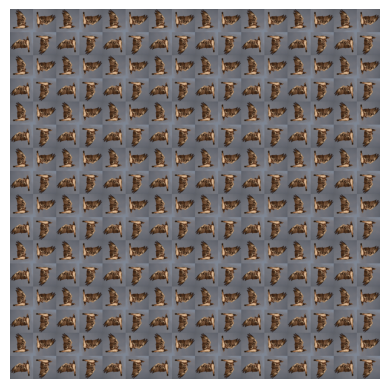

(array([[[ 96,  98, 105],
         [ 95,  98, 105],
         [ 94,  97, 104],
         ...,
         [ 93,  96, 103],
         [ 97,  97, 105],
         [ 96,  98, 105]],
 
        [[ 97,  97, 105],
         [ 94,  97, 104],
         [ 96,  99, 106],
         ...,
         [ 95,  98, 105],
         [ 94,  97, 104],
         [ 95,  98, 105]],
 
        [[ 93,  96, 103],
         [ 95,  98, 105],
         [ 95,  97, 104],
         ...,
         [ 95,  97, 104],
         [ 96,  99, 106],
         [ 94,  97, 104]],
 
        ...,
 
        [[ 94,  97, 104],
         [ 96,  99, 106],
         [ 95,  97, 104],
         ...,
         [ 93,  96, 105],
         [ 97, 100, 109],
         [ 95,  98, 107]],
 
        [[ 95,  98, 105],
         [ 94,  97, 104],
         [ 95,  98, 105],
         ...,
         [ 94,  98, 107],
         [ 94,  97, 106],
         [ 94,  97, 106]],
 
        [[ 96,  98, 105],
         [ 97,  97, 105],
         [ 93,  96, 103],
         ...,
         [ 93,  97, 106],
  

In [10]:
fn = './images/eagle.jpg'
m = 64
n = 8

p1_checker(fn, m, n)

## Problem 2



In [11]:
def calculate_max_distance_from_coordinates(image: np.ndarray, coordinates: tuple[int]) -> float:
  """
  Given some coordinates, finds the largest distance from said coordinates

  Args:
    image (np.ndarray): Image the calculation will be calculated wrt
    coordinates (tuple[int]): Row and column indices of a coordinate

  Returns:
    float -> maximum distance from/to {coordinates}
  """
  M, N, _ = image.shape
  r0, c0 = coordinates
  return np.sqrt((max(r0, M - 1 - r0)) ** 2 + (max(c0, N - 1 - c0)) ** 2)

def calculate_distance_matrix(image: np.ndarray, coordinates: tuple[int]) -> np.ndarray:
  """
  Calcualtes the distance of each pixel from {coordinates}

  Args:
    image (np.ndarray): Image the calculation will be calculated wrt
    coordinates (tuple[int]): Row and column indices of a coordinate

  Returns:
    np.ndarray -> Distance matrix, D, such that each element is the distance that pixel is from {coordinates}
  """

  M, N, _ = image.shape
  i: np.ndarray = np.arange(M).reshape(M,1)
  j: np.ndarray = np.arange(N).reshape(1,N)

  row_difference: np.ndarray = i - coordinates[0]
  col_difference: np.ndarray = j - coordinates[1]

  D: np.ndarray = np.sqrt(row_difference ** 2 + col_difference ** 2)
  return D

def calculate_weight_matrix(D: np.ndarray, max_distance: float) -> np.ndarray:
  """
  Calculates the weights necessary for each pixel based on their distance from some coordinates

  Args:
    D (np.ndarray): Distance of each pixel from each coordinate
    max_distance (float): Max distance any pixel could be from the aforementioned coordinates

  Returns:
    np.ndarray -> Weight matrix wrt distance matrix, D
  """

  return 1 - np.sqrt(D / max_distance)

def apply_vignette_to_image(image: np.ndarray, W: np.ndarray) -> np.ndarray:
  """
  Performs vignetting to given image using weight matrix, W, calculated from pixel distances from a given coordinate

  Args:
    image (np.ndarray): Image to apply vignetting effect to
    W (np.ndarray): Weight matrix

  Returns:
    np.ndarray -> vignetted image
  """
  _,_, C = image.shape
  W = np.repeat(np.expand_dims(W, axis=2), C, axis=2)
  vignette_image: np.ndarray = W * image
  return vignette_image.astype(np.uint8)

223.60679774997897
[[223.60679775 222.71281957 221.81974664 ... 139.31618714 140.01428499
  140.7160261 ]
 [223.16137659 222.26560688 221.37072977 ... 138.6001443  139.30183057
  140.00714267]
 [222.7195546  221.82200071 220.92532675 ... 137.88763541 138.59292911
  139.30183057]
 ...
 [210.29740845 209.34660255 208.39625716 ... 116.7647207  117.59676866
  118.43141475]
 [210.6086418  209.65924735 208.71032557 ... 117.32433678 118.1524439
  118.98319209]
 [210.92415699 209.97618913 209.02870616 ... 117.88977903 118.71394189
  119.54078802]]
(168, 300)
W[42,75] = 0.21497584056360608
W[42,75] = 0.4685364208132966
W[42,75] = 0.24436674840747286
W[42,75] = 0.5983693731655495
(168, 300, 3)


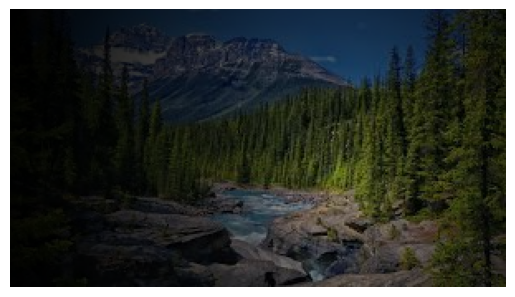

In [12]:
d_m: float = calculate_max_distance_from_coordinates(image=mountain_image, coordinates=(100, 200))
print(d_m)
D: np.ndarray = calculate_distance_matrix(image=mountain_image, coordinates=(100,200))
print(D)
print(D.shape)
W: np.ndarray = calculate_weight_matrix(D=D, max_distance=d_m)
print(f"W[42,75] = {W[42,75]}")
print(f"W[42,75] = {W[42,225]}")
print(f"W[42,75] = {W[126,75]}")
print(f"W[42,75] = {W[126,225]}")
vignette_image: np.ndarray = apply_vignette_to_image(image=mountain_image, W=W)
display_image(image=vignette_image)

In [13]:
def p2_vignette(image_filepath: str, row_coord: int, col_coord: int) -> np.ndarray:
  """
  Applies vignetting to image found at {image_foundpath} by calculating the weight matrix w.r.t ({row_coord}, {col_coord})

  Args:
    image_filepath (str): Directory and filename of the image to be vignetted
    row_coord (int): x of coordinates where distances will be calculated from
    col_coord (int): y of coordinates where distances will be calculated from

  Returns:
    np.ndarray -> vignetted image
  """
  image: np.ndarray = read_image(image_filepath=image_filepath)
  M, N, _ = image.shape
  d_m: float = calculate_max_distance_from_coordinates(image=image, coordinates=(row_coord, col_coord))
  D: np.ndarray = calculate_distance_matrix(image=image, coordinates=(row_coord, col_coord))
  W: np.ndarray = calculate_weight_matrix(D=D, max_distance=d_m)
  vignette_image: np.ndarray = apply_vignette_to_image(image=image, W=W)

  print(f"d_m = {d_m:.1f}")

  display_coords: list[tuple[int]] = [(M // 4, N // 4), (M // 4, ((3 * N) // 4)), (3 * M // 4, (N // 4)), (3 * M // 4, (3 * N // 4))]
  display_matrices: list[tuple[str, np.ndarray]] = [("W", W), ("I", vignette_image)]
  for display_matrix in display_matrices:
    letter, matrix = display_matrix
    for coord in display_coords:
      if (letter == "W"):
        print(f"{letter}[{coord[0]}, {coord[1]}] = {matrix[coord]:.2f}")
        continue
      print(f"{letter}[{coord[0]}, {coord[1]}] = {matrix[coord]}")
  display_image(image=vignette_image)

d_m = 223.6
W[42, 75] = 0.21
W[42, 225] = 0.47
W[126, 75] = 0.24
W[126, 225] = 0.60
I[42, 75] = [12 17 34]
I[42, 225] = [32 56 79]
I[126, 75] = [27 26 21]
I[126, 225] = [74 81 41]
(168, 300, 3)


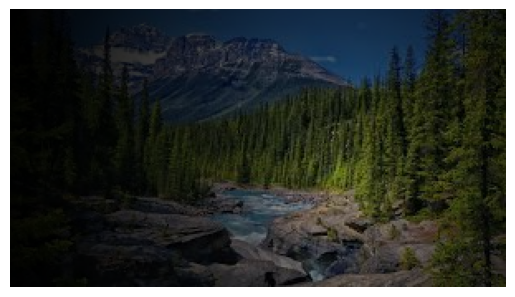

In [14]:
fn = "./images/mountain.jpg"
r0 = 100
c0 = 200

p2_vignette(fn, r0, c0)

d_m = 335.0
W[85, 128] = 0.38
W[85, 384] = 0.35
W[255, 128] = 0.28
W[255, 384] = 0.26
I[85, 128] = [86 87 88]
I[85, 384] = [82 82 83]
I[255, 128] = [41 39 36]
I[255, 384] = [3 3 6]
(341, 512, 3)


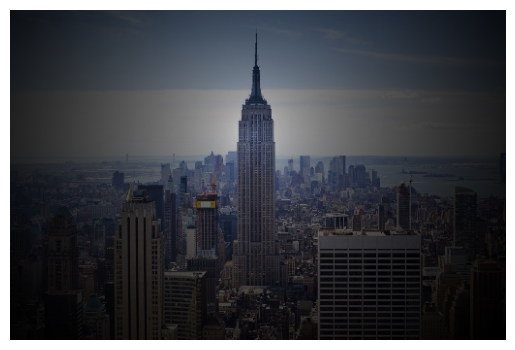

In [15]:
fn = "./images/skyline.jpg"
r0 = 130
c0 = 250

p2_vignette(fn, r0, c0)

## Problem 3


In [28]:
def compute_scale_factors(image: np.ndarray, m: int, n: int) -> tuple[float]:
  """
  Calculates the scale factors of the {image} w.r.t {m} and {n}

  Args:
    image (np.ndarray): Image to generate scale factor from
    m (int): number of rows in the downsized image
    n (int): number of cols in the downsized image

  Returns:
    tuple[float] -> scale factors in both the row & col dimensions
  """
  M, N, _ = image.shape
  return M / m, N / n

def create_downsized_image(image: np.ndarray, block_size: int, downsized_image_shape: tuple[int]) -> np.ndarray:
  """
  Given an image, {image}, generate a downsized image of size {downsized_image_shape} by averaging pixel intensities across a block_size x block_size region

  Args:
    image (np.ndarray): Image to be downsized
    block_size (int): Dimensions of regions of pixels that correspond to the downsized images pixel at some (i,j)
    downsized_image_shape (tuple[int]): Dimensions of downsized image

  Returns:
    np.ndarray -> downsized image
  """
  # ADD channel dimension (shape) to end of downsize_image_shape before function
  # *********************************
  M, N, _ = image.shape
  s_m, s_n = compute_scale_factors(image=image, m=downsized_image_shape[0], n=downsized_image_shape[1])
  block_row_size, block_col_size = round(s_m), round(s_n)
  num_block_rows, num_block_cols = M // block_row_size, N // block_col_size # Number of blocks in each row or each column
  downsized_image: np.ndarray = np.zeros(shape=(downsized_image_shape[0] * block_size, downsized_image_shape[1] * block_size, downsized_image_shape[2]))
  block_region: np.ndarray # Matrix of pixels for a given location on the image
  current_row_start, current_col_start = 0,0 # Pointers for where slicing should start
  current_row_end: int = current_row_start + block_row_size
  current_col_end: int

  for i in range(0,num_block_rows):
    for j in range(0,num_block_cols):
      current_col_end = current_col_start + block_col_size
      block_region = image[current_row_start:current_row_end, current_col_start:current_col_end,::]
      if not len(block_region):
        print(f"row start: {current_row_start}")
        print(f"row end: {current_row_end}")
        print(f"col start: {current_col_start}")
        print(f"col end: {current_col_end}")

      # print(f"Block Region: {block_region}")
      downsized_image[i,j] = block_region.mean() # Assign pixels average intensity of given block to downsized image
      current_col_start = current_col_end
    current_row_start = current_row_end # Given a new row of blocks, start from this blocks first row
    current_row_end += block_row_size
    current_col_start = 0 # Given a new row of blocks, start from this blocks first column

  downsized_image = downsized_image.astype(np.uint8)
  print(downsized_image[370,200,])
  print(downsized_image[270,180,])
  print(downsized_image.shape)
  return downsized_image

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13


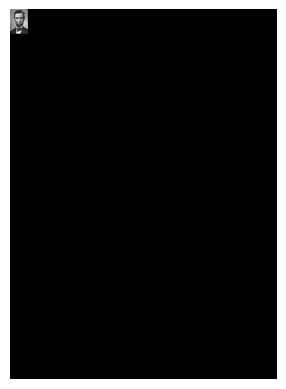

In [29]:
abe_linc: np.ndarray = read_image(image_filepath="./images/lincoln1.jpg", convert_to_grayscale=True)
b = 15
m = 25
n = 18

downsized_image: np.ndarray = create_downsized_image(image=abe_linc, block_size=b, downsized_image_shape=(m,n,3))
display_image(image=downsized_image)

In [18]:

def p3_block(image_filepath: str, m: int, n: int, b: int) -> np.ndarray:
  image: np.ndarray = read_image(image_filepath=image_filepath, convert_to_grayscale=True)
  _, _, C = image.shape
  downsized_image_shape: tuple[int] = (m,n,C)

In [19]:
fname = "./images/lincoln1.jpg"
m = 25
n = 18
b = 15

p3_block(fname, m, n, b)

In [20]:
fname = "./images/ginsburg.jpg"
m = 30
n = 16
b = 14

p3_block(fname, m, n, b)